In [54]:
from matplotlib.style import use
import pandas as pd
import seaborn as sns
import os
import re

%matplotlib inline
use('ggplot')

In [60]:
dfs = [pd.read_csv(os.path.join("data", file), index_col=0, na_values=["-", "N.A."],
                  thousands=',') for file in os.listdir("data")]
used_cars = pd.concat(dfs, ignore_index=True)
df = used_cars.dropna()

comma_replacer = lambda s: s.replace(',','')
list_price = (df["list price"].str[1:]
                              .apply(comma_replacer)
                              .apply(int))
mileage=(df['mileage'].str[:-3]
                      .apply(comma_replacer)
                      .apply(int))

df = df.assign(**{'list price ($)': list_price, 'mileage (km)': mileage})

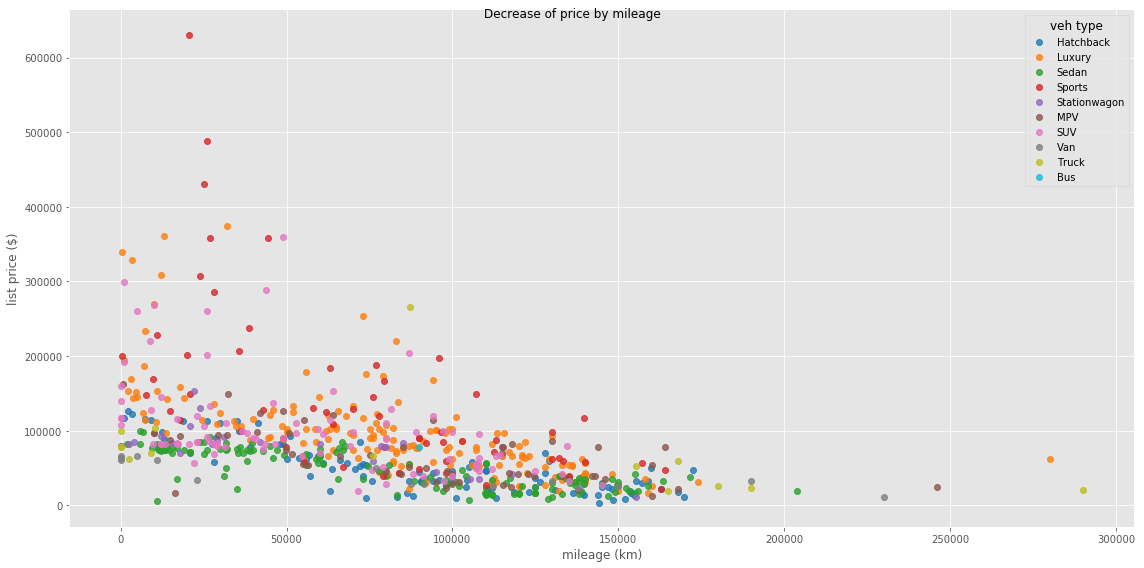

In [65]:
g = sns.lmplot("mileage (km)", "list price ($)", df, "veh type", fit_reg=False, legend_out=False, size=8, aspect=2,
               palette="tab10")
g.fig.suptitle("Decrease of price by mileage");